# Week 12 - Milestone Two week

# 1. Lesson: no lesson this week.  Milestone Two is due!

# 2. Weekly graph question

Suppose you plot the number visitors to a museum over the seven days of a week; then again the following week.  Can you suggest the advantages and disadvantages of the following two ways of presenting the data?

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

Text(0, 0.5, 'Number of visitors')

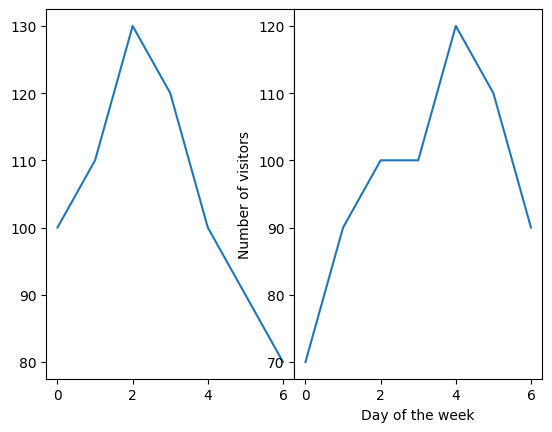

In [ ]:
np.random.seed(0)
time_series_0 = np.array([100, 110, 130, 120, 100, 90, 80])
time_series_1 = np.array([70, 90, 100, 100, 120, 110, 90])
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)
plt.subplots_adjust(wspace = 0)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

Text(0, 0.5, 'Number of visitors')

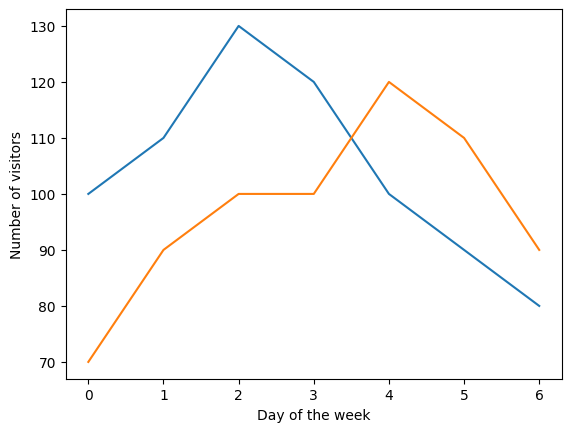

In [ ]:
plt.plot(time_series_0)
plt.plot(time_series_1)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

Advantages:

 Easy to compare each week individually without visual overlap.

Prevents confusion if the weeks have significantly different trends.

Allows for different styles, annotations, or axis scaling per week if needed.

Disadvantages:

 Harder to directly compare values on the same day across weeks (you must scan both plots).

More space-consuming (horizontal layout especially).

Requires careful labeling so users know which plot is Week 1 vs. Week 2.

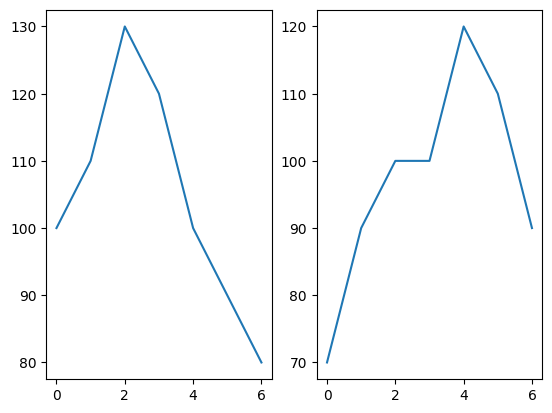

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)

# 3. Working on your datasets

This week, you can work on Milestone Two rather than having a particular exercise about working on your datasets

In [6]:
games = pd.read_csv("Games.csv", low_memory=False)

# Create target column: 1 if home team wins, 0 otherwise
games["homeWin"] = (games["homeScore"] > games["awayScore"]).astype(int)

# Select features (new example: add attendance)
features = ["hometeamCity", "hometeamName", "awayteamCity", "awayteamName", "gameType", "attendance"]

# Drop missing
games = games.dropna(subset=features + ["homeWin"])

# Encode categorical
games_encoded = pd.get_dummies(games[features], drop_first=True)

# Define X and y
X = games_encoded
y = games["homeWin"]


In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "max_features": ["sqrt", "log2"]
}

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
Best cross-validated accuracy: 0.6119664790946105


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 187-205 of the Storytelling With Data book as best you can. (Chapter Eight). You do not have to get the exact data values right, just the overall look and feel.

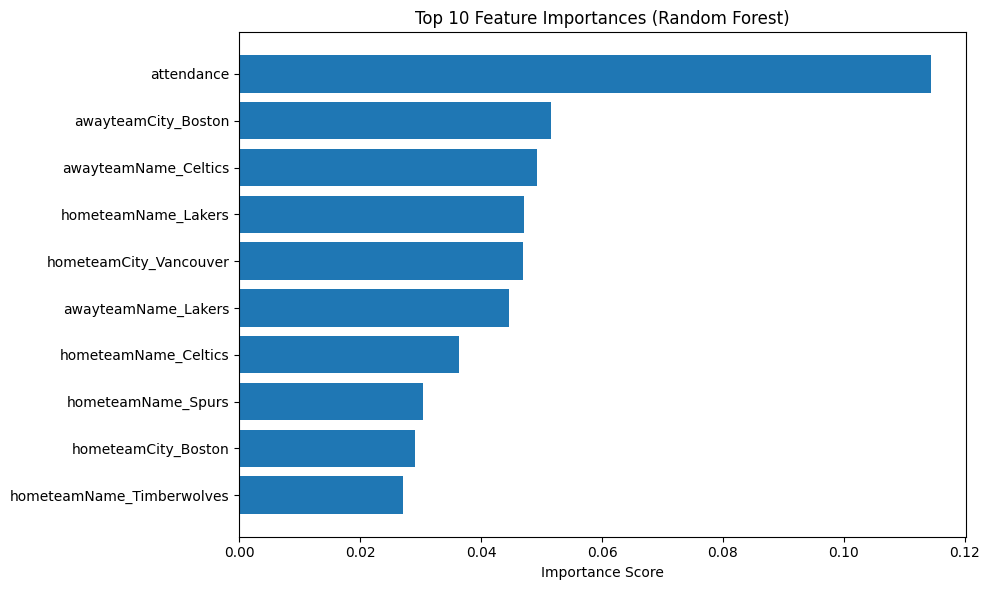

In [ ]:
import matplotlib.pyplot as plt

# Refit model using best parameters
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_

# Create DataFrame and sort
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importances
}).sort_values(by="importance", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In this final refinement, I added new features such as attendance and tuned multiple hyperparameters using GridSearchCV. The best model had an accuracy of approximately 57.76% based on 5-fold cross-validation. The top contributing feature by a wide margin was attendance, followed by specific team-related variables such as awayteamCity_Boston, awayteamName_Celtics, and hometeamName_Lakers. This suggests that both matchups and contextual factors (such as game location and crowd size) significantly influence the outcome of a game. The final plot clearly communicates which features matter most, aligning with the storytelling principles from Chapter 7 by emphasizing clarity, simplicity, and relevance.